In [ ]:
#Challenge

# 1) Import your data into a Pandas DataFrame.
# 2) Merge your DataFrames.
# 3) Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# 4) Determine the mean, median, and mode for the following:
# 5) The total number of rides for each city type.
# 6) The average fares for each city type.
# 7) The total number of drivers for each city type.
# 8) Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# 9) The number of rides for each city type.
# 10) The fares for each city type.
# 11) The number of drivers for each city type.
# 12) Create a pie chart that visualizes each of the following data for each city type:
# 13) The percent of total fares.
# 14) The percent of total rides.
# 15) The percent of total drivers.

In [ ]:
#Load the CSVs
#Add Matplotlib inline magic command
%matplotlib inline

#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
#import os if you wan to load CSV files via "os.path.join()"



In [ ]:
# Load the CSVs
city_data_to_load="Resources/city_data.csv"
ride_data_to_load="Resources/ride_data.csv"

In [ ]:
# 1) Import your data into a Pandas DataFrame.
#Read the City and Ride data and store into a Pandas DataFrame
city_data_df=pd.read_csv(city_data_to_load)
ride_data_df=pd.read_csv(ride_data_to_load)

In [ ]:
#view city_data_df
city_data_df.head()

In [ ]:
#view ride_data_df
ride_data_df.head()

In [ ]:
#Inspect the data for city_data_df
# 1a) Get the columns and the rows that are not null.
city_data_df.count()


In [ ]:
# 1b) Get the columns and the rows that are not null.
city_data_df.isnull().sum()

In [ ]:
# 2) Make sure the driver_count column has an integer data type.
# Get the data types of each column.
city_data_df.dtypes


In [ ]:
# 3a)Find out how many data points there are for each type of city.
#Get the unique values of the type of city
city_data_df["type"].unique()

In [ ]:
# 3b)Find out how many data points there are for each type of city.
#Get the number of data points from the urban cities
sum(city_data_df["type"]=="Urban")


In [ ]:
#Get the number of data points from the Suburban cities
sum(city_data_df["type"]=="Suburban")

In [ ]:
#Get the number of data points from the Rural cities
sum(city_data_df["type"]=="Rural")

In [ ]:
#Inspect the data for ride_data_df
# 1a) Get all the rows that contain null values.
#Get the columns and the rows that are not null using count
ride_data_df.count()


In [ ]:
# 1b) Get all the rows that contain null values.
#Get the columns and the rows that are not null using isnull().sum()
ride_data_df.isnull().sum()

In [ ]:
# 2) Make sure the fare and ride_id columns are numerical data types to perform calculations
#Get the data types of each column
ride_data_df.dtypes

In [ ]:
#DataFrames are clean....you can proceed to merge DataFrames

# 2) Merge your DataFrames.
#Combine the data into a single dataset
pyber_data_df=pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

#Display the DataFrame
pyber_data_df.head()

In [ ]:
# 3) Create a bubble chart that showcases the average fare versus the total number of rides
#with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# TIP: to be more efficient create separate DataFrames for each type and then Data Series for each step


#steps to create a bubble chart:
# 1) To get the average fare, we can use the Pandas mean() method for each city in the "fare" column.
# 2) To get the total number of rides for each city, we can use the Pandas count() method for each city in the "ride_id" column.
# 3) To make the bubble size correlate to the number of drivers for each city, we can get the average driver_count for each city.

In [ ]:
#Create the Urban City DataFrame
urban_cities_df=pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df.head()

In [ ]:
#Create the Suburban City DataFrame
suburban_cities_df=pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df.head()

In [ ]:
#Create the Rural City DataFrame
rural_cities_df=pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df.head()

In [ ]:
#To get the number of rides for each city by each type of city, we have to create a Series where the index
#is the name of the city and the column is the number of rides for that city.

#Create a Data Series with one column of the DataFrame use groupby()
#Get the number of rides for urban cities
urban_ride_count=urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

In [ ]:
#Get the number of rides for suburban cities
suburban_ride_count=suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

In [ ]:
#Get the number of rides for rural cities
rural_ride_count=rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

In [ ]:
# 3) Create a bubble chart that showcases the average fare versus the total number of rides with bubble size 
#based on the total number of drivers for each city type, including urban, suburban, and rural.

#Get the avearge fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

In [ ]:
#Get the avearge fare for each city in the suburban cities.
suburban_avg_fare=suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

In [ ]:
#Get the avearge fare for each city in the rural cities.
rural_avg_fare=rural_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

In [ ]:
#Get the average number of drivers for each urban city
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

In [ ]:
#Get the average number of drivers for each suburban city
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

In [ ]:
#Get the average number of drivers for each rural city
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

In [ ]:
# Create a scatter plot for each type of city where the following conditions are met:
# The x-axis is the number of rides for each city.
# The y-axis is the average fare for each city.
# The size of each marker is the average number of drivers in each city.

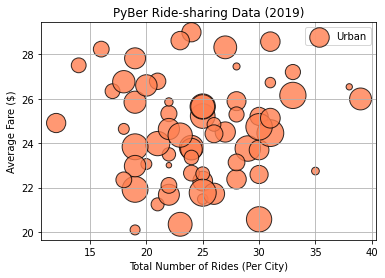

In [62]:
#Create the urban cities bubble chart

#Build the scatter plots for urban cities
plt.scatter(urban_ride_count,urban_avg_fare,s=10*urban_driver_count, c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

# Create lables for the x and y axes.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# # Create the title.
plt.title("PyBer Ride-sharing Data (2019)")

#Add a grid
plt.grid(True)

#Add a legend
plt.legend()



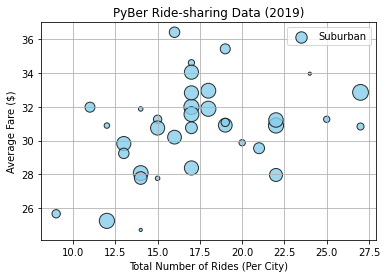

In [63]:
#Create the suburban cities bubble chart

#Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

# Create lables for the x and y axes.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# # Create the title.
plt.title("PyBer Ride-sharing Data (2019)")

#Add a grid
plt.grid(True)

#Add a legend
plt.legend()

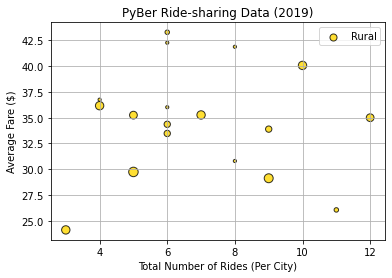

In [64]:
#Create the rural cities bubble chart

#Build the scatter plots for rural cities
plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Create lables for the x and y axes.
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# # Create the title.
plt.title("PyBer Ride-sharing Data (2019)")

#Add a grid
plt.grid(True)

#Add a legend
plt.legend()

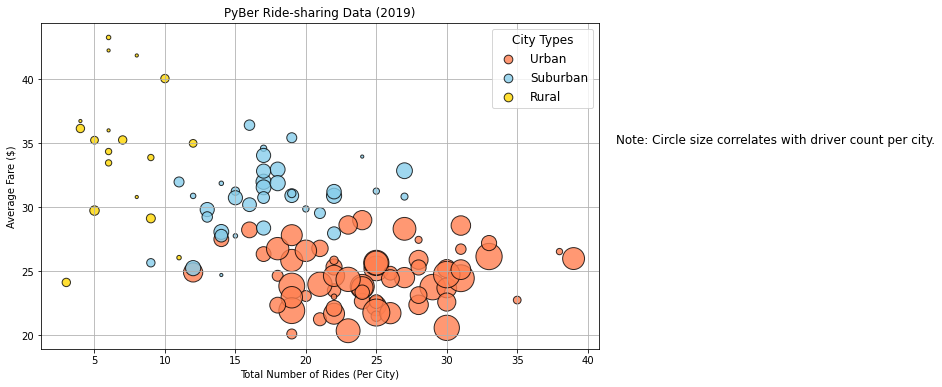

In [72]:
#Add the scatter charts for each type of the city
#Increase font size
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,urban_avg_fare, s=10*urban_driver_count, 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,suburban_avg_fare,
            s=10*suburban_driver_count, c="skyblue", 
            edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,rural_avg_fare,
            s=10*rural_driver_count, c="gold", 
            edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

#Incorporate the other graph properties for title, labels and grid
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-sharing Data (2019)")
plt.grid(True)

#Create (customize) the legend
lgnd=plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)


#Incorporate a text label about circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")


#Save the chart and show the plot
plt.savefig("analysis/Fig1.png")
plt.show()